In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.dates import YearLocator, DateFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

# Set style yang elegant
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

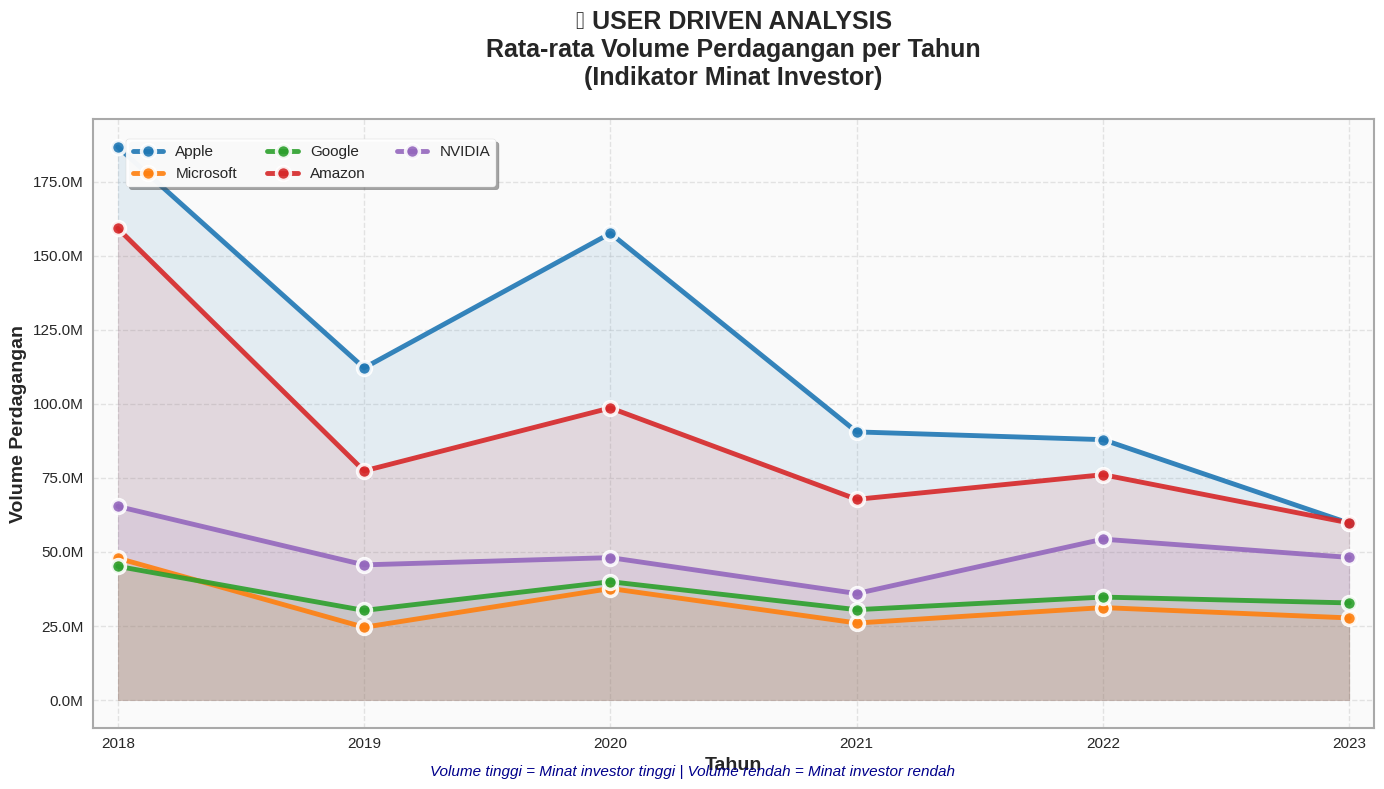


📊 USER DRIVEN ANALYSIS - VOLUME PERDAGANGAN
💡 Volume perdagangan mencerminkan tingkat minat dan aktivitas investor
📈 Semakin tinggi volume = Semakin tinggi minat investor (user driven)
----------------------------------------------------------------------

🏆 TAHUN DENGAN PERTUMBUHAN MINAT INVESTOR TERTINGGI:
--------------------------------------------------
Apple        | 2020 | + 40.5% |  157.6M
Amazon       | 2020 | + 27.5% |   98.6M
Google       | 2020 | + 32.0% |   40.0M
Microsoft    | 2020 | + 53.2% |   37.7M
NVIDIA       | 2022 | + 51.1% |   54.3M

📋 Total data points: 30 (5 perusahaan x 6 tahun)
📅 Periode analisis: 2018 - 2023


,Company,Year,Volume,Volume Growth (%)
0,AAPL,2018,1.867093e+08,NaN
1,AAPL,2019,1.121228e+08,-39.947946
2,AAPL,2020,1.575646e+08,40.528655
3,AAPL,2021,9.052463e+07,-42.547628
4,AAPL,2022,8.791038e+07,-2.887889
5,AAPL,2023,5.967729e+07,-32.115764
6,AMZN,2018,1.592264e+08,NaN
7,AMZN,2019,7.735318e+07,-51.419368
8,AMZN,2020,9.861982e+07,27.492903
9,AMZN,2021,6.776334e+07,-31.288313


In [25]:
# Konfigurasi matplotlib
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11

# ============================================
# USER DRIVEN ANALYSIS - CHART DIPERCANTIK
# ============================================

# 📥 Load Data
df = pd.read_csv("saham.csv")

# Pilih hanya 5 perusahaan: Apple, Microsoft, Google, Amazon, Nvidia
selected_companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']
df = df[df['Company'].isin(selected_companies)].copy()

# Ubah 'Date' ke datetime dan ekstrak tahun
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['Year'] = df['Date'].dt.year

# Rata-rata volume per tahun (USER DRIVEN METRIC)
avg_volume = df.groupby(['Company', 'Year'])['Volume'].mean().reset_index()

# Growth volume tahunan (user interest naik/turun)
avg_volume['Volume Growth (%)'] = avg_volume.groupby('Company')['Volume'].pct_change() * 100

# Color palette untuk setiap perusahaan
company_colors = {
    'AAPL': '#1f77b4',
    'MSFT': '#ff7f0e', 
    'GOOGL': '#2ca02c',
    'AMZN': '#d62728',
    'NVDA': '#9467bd'
}

# Mapping nama perusahaan
company_names = {
    'AAPL': 'Apple',
    'MSFT': 'Microsoft',
    'GOOGL': 'Google',
    'AMZN': 'Amazon',
    'NVDA': 'NVIDIA'
}

# Fungsi format volume
def format_volume(x, pos):
    return f'{x/1e6:.1f}M'

# CHART USER DRIVEN - DIPERCANTIK
fig, ax = plt.subplots(figsize=(14, 8))

# Plot line dengan styling menarik
for company in selected_companies:
    company_data = avg_volume[avg_volume['Company'] == company]
    
    # Plot line dengan marker yang bagus
    ax.plot(company_data['Year'], company_data['Volume'], 
            marker='o', 
            linewidth=3.5, 
            markersize=10,
            label=company_names[company],
            color=company_colors[company],
            markerfacecolor=company_colors[company],
            markeredgecolor='white',
            markeredgewidth=2.5,
            alpha=0.9)
    
    # Tambahkan area fill di bawah line untuk efek visual
    ax.fill_between(company_data['Year'], company_data['Volume'], 
                    alpha=0.1, color=company_colors[company])

# Styling judul dan label
ax.set_title('📊 USER DRIVEN ANALYSIS\nRata-rata Volume Perdagangan per Tahun\n(Indikator Minat Investor)', 
             fontsize=18, fontweight='bold', pad=25)
ax.set_xlabel('Tahun', fontsize=14, fontweight='bold')
ax.set_ylabel('Volume Perdagangan', fontsize=14, fontweight='bold')

# Format y-axis dalam jutaan
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_volume))

# Grid styling yang halus
ax.grid(True, linestyle='--', alpha=0.6, color='lightgray', linewidth=1)
ax.set_facecolor('#fafafa')

# Legend dengan styling menarik
legend = ax.legend(frameon=True, 
                  fancybox=True, 
                  shadow=True, 
                  ncol=3, 
                  loc='upper left',
                  bbox_to_anchor=(0.02, 0.98),
                  framealpha=0.95)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('lightgray')

# Border styling
for spine in ax.spines.values():
    spine.set_edgecolor('darkgray')
    spine.set_linewidth(1.5)

# Set limits dan ticks
ax.set_xlim(avg_volume['Year'].min() - 0.1, avg_volume['Year'].max() + 0.1)
years = sorted(avg_volume['Year'].unique())
ax.set_xticks(years)

# Tambahkan subtitle dengan insight
plt.figtext(0.5, 0.02, 
            'Volume tinggi = Minat investor tinggi | Volume rendah = Minat investor rendah', 
            ha='center', fontsize=11, style='italic', color='darkblue')

plt.tight_layout()
plt.show()

# ============================================
# TAMPILKAN DATA USER DRIVEN
# ============================================

print("\n" + "="*70)
print("📊 USER DRIVEN ANALYSIS - VOLUME PERDAGANGAN")
print("="*70)
print("💡 Volume perdagangan mencerminkan tingkat minat dan aktivitas investor")
print("📈 Semakin tinggi volume = Semakin tinggi minat investor (user driven)")
print("-"*70)

# Tahun dengan pertumbuhan volume tertinggi per perusahaan
max_growth = avg_volume.loc[avg_volume.groupby('Company')['Volume Growth (%)'].idxmax()]
max_growth_clean = max_growth.dropna(subset=['Volume Growth (%)'])

print("\n🏆 TAHUN DENGAN PERTUMBUHAN MINAT INVESTOR TERTINGGI:")
print("-"*50)
for _, row in max_growth_clean.iterrows():
    company_name = company_names[row['Company']]
    year = int(row['Year'])
    growth = row['Volume Growth (%)']
    volume = row['Volume']
    print(f"{company_name:12} | {year} | +{growth:5.1f}% | {volume/1e6:6.1f}M")

# Return data untuk penggunaan lebih lanjut
print(f"\n📋 Total data points: {len(avg_volume)} (5 perusahaan x {len(years)} tahun)")
print(f"📅 Periode analisis: {min(years)} - {max(years)}")

# Tampilkan data
avg_volume

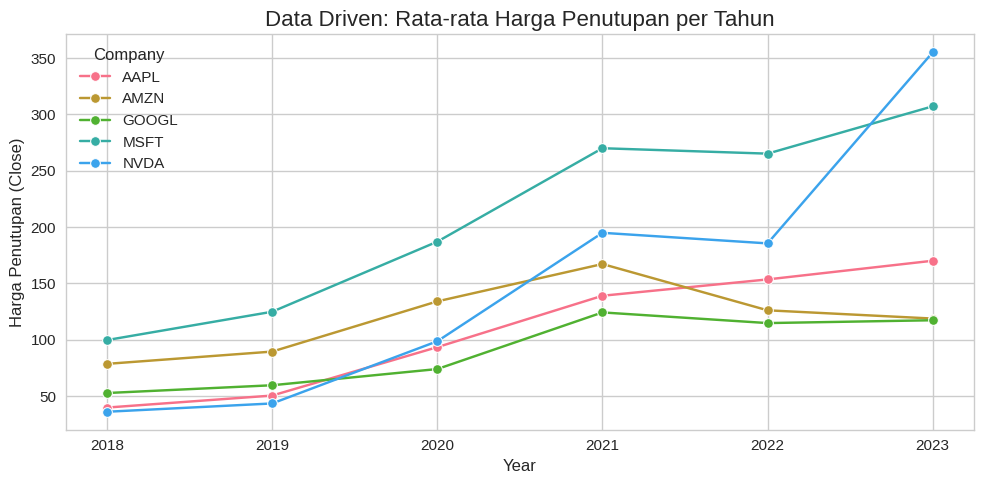

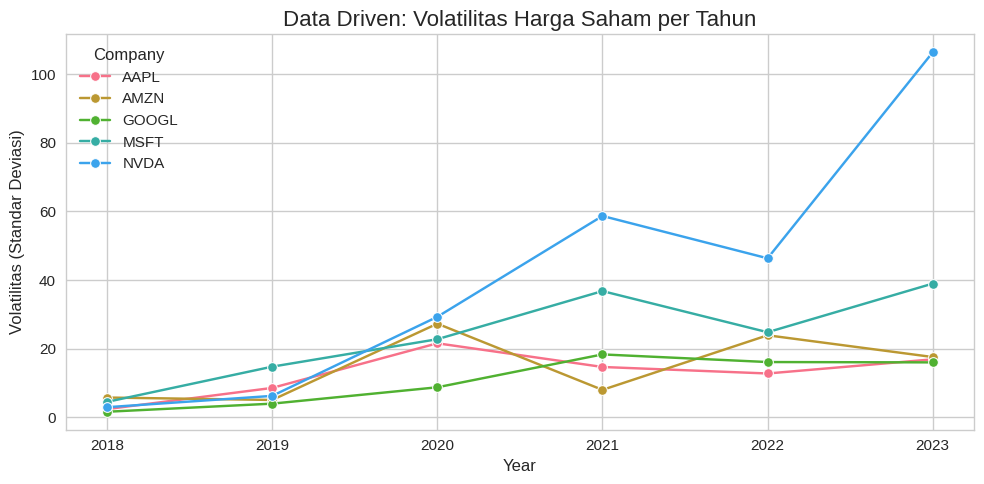

,Company,Year,Avg Close,Volatility
0,AAPL,2018,39.754337,2.398567
1,AAPL,2019,50.420533,8.571085
2,AAPL,2020,93.394365,21.573179
3,AAPL,2021,139.023771,14.673547
4,AAPL,2022,153.523796,12.774159
5,AAPL,2023,170.107740,16.900343
6,AMZN,2018,78.555142,5.771864
7,AMZN,2019,89.459460,5.065682
8,AMZN,2020,134.042755,27.288052
9,AMZN,2021,167.193349,8.002098


In [27]:
## DATA DRIVEN
# Rata-rata harga penutupan per tahun
avg_close = df.groupby(['Company', 'Year'])['Close'].mean().reset_index(name='Avg Close')

# Volatilitas (standar deviasi) harga penutupan per tahun
volatility = df.groupby(['Company', 'Year'])['Close'].std().reset_index(name='Volatility')

# Gabungkan keduanya
data_driven = pd.merge(avg_close, volatility, on=['Company', 'Year'])

# Plot rata-rata harga penutupan
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_driven, x='Year', y='Avg Close', hue='Company', marker='o')
plt.title('Data Driven: Rata-rata Harga Penutupan per Tahun')
plt.ylabel('Harga Penutupan (Close)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot volatilitas
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_driven, x='Year', y='Volatility', hue='Company', marker='o')
plt.title('Data Driven: Volatilitas Harga Saham per Tahun')
plt.ylabel('Volatilitas (Standar Deviasi)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Tampilkan tabel ringkasan
data_driven


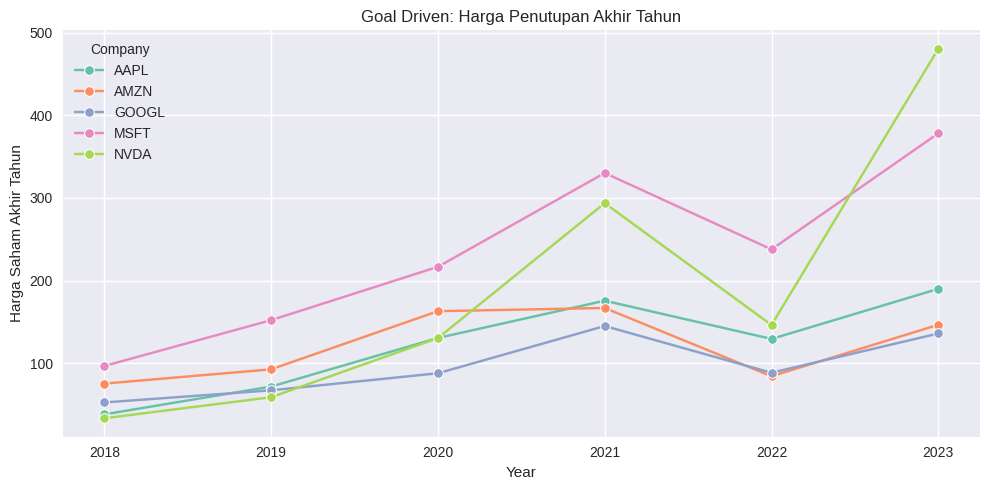

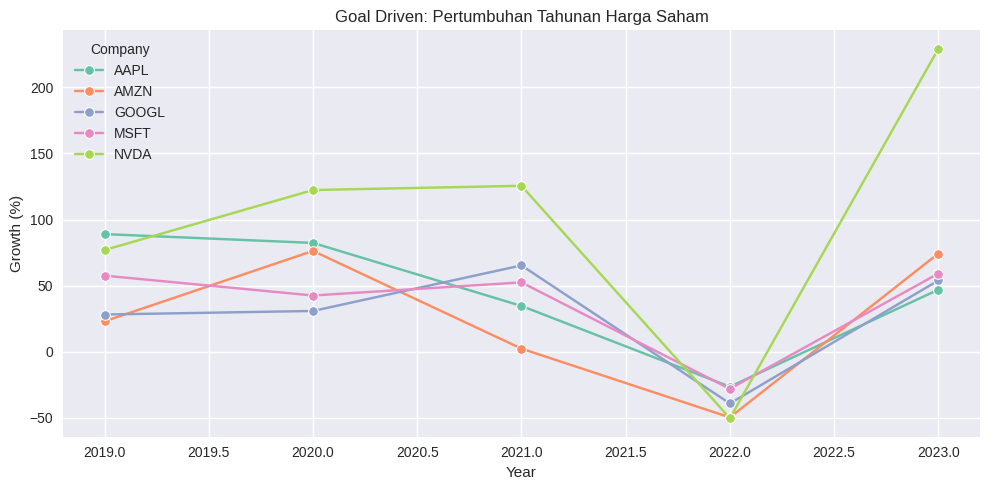

,Company,Year,Close,Close Growth (%)
9175,AAPL,2018,37.850140,NaN
126654,AAPL,2019,71.520813,88.957858
246586,AAPL,2020,130.387253,82.306726
368153,AAPL,2021,175.564072,34.648187
490293,AAPL,2022,129.207794,-26.404194
602471,AAPL,2023,189.884995,46.960944
9178,AMZN,2018,75.098503,NaN
126657,AMZN,2019,92.391998,23.027750
246589,AMZN,2020,162.846497,76.256061
368156,AMZN,2021,166.716995,2.376777


In [19]:
## GOAL DRIVEN
# Ambil data penutupan terakhir setiap tahun per perusahaan
end_of_year = df.sort_values('Date').groupby(['Company', 'Year']).tail(1)
end_close = end_of_year[['Company', 'Year', 'Close']].sort_values(['Company', 'Year'])

# Hitung pertumbuhan tahunan
end_close['Close Growth (%)'] = end_close.groupby('Company')['Close'].pct_change() * 100

# Plot harga penutupan akhir tahun
plt.figure(figsize=(10, 5))
sns.lineplot(data=end_close, x='Year', y='Close', hue='Company', marker='o')
plt.title('Goal Driven: Harga Penutupan Akhir Tahun')
plt.ylabel('Harga Saham Akhir Tahun')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot pertumbuhan harga penutupan
plt.figure(figsize=(10, 5))
sns.lineplot(data=end_close, x='Year', y='Close Growth (%)', hue='Company', marker='o')
plt.title('Goal Driven: Pertumbuhan Tahunan Harga Saham')
plt.ylabel('Growth (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Tampilkan tabel ringkasan
end_close


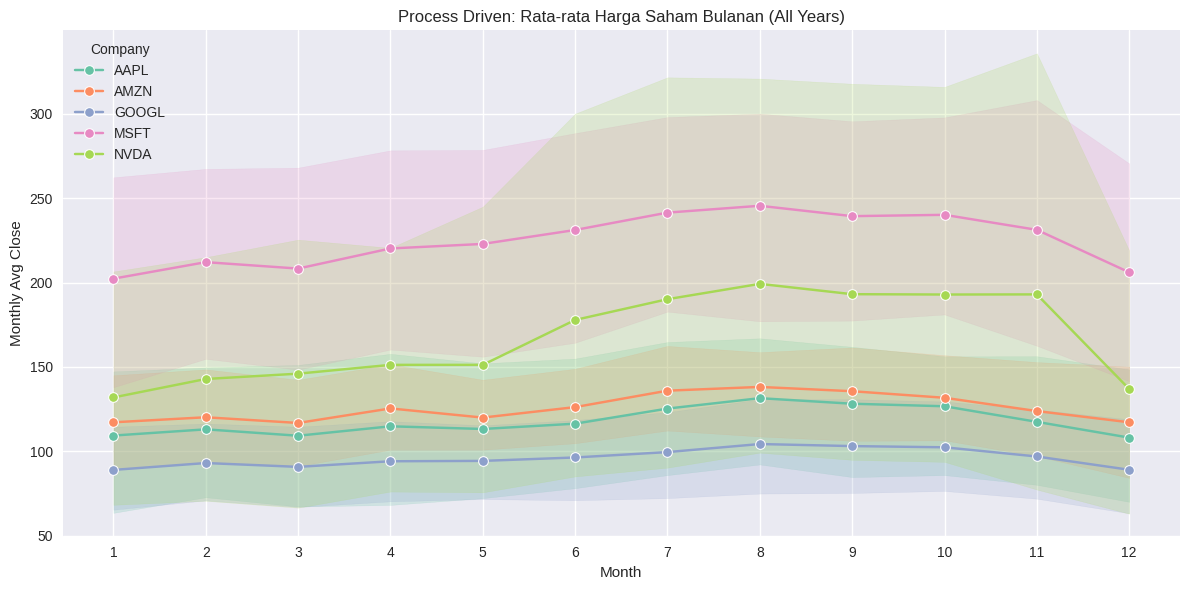

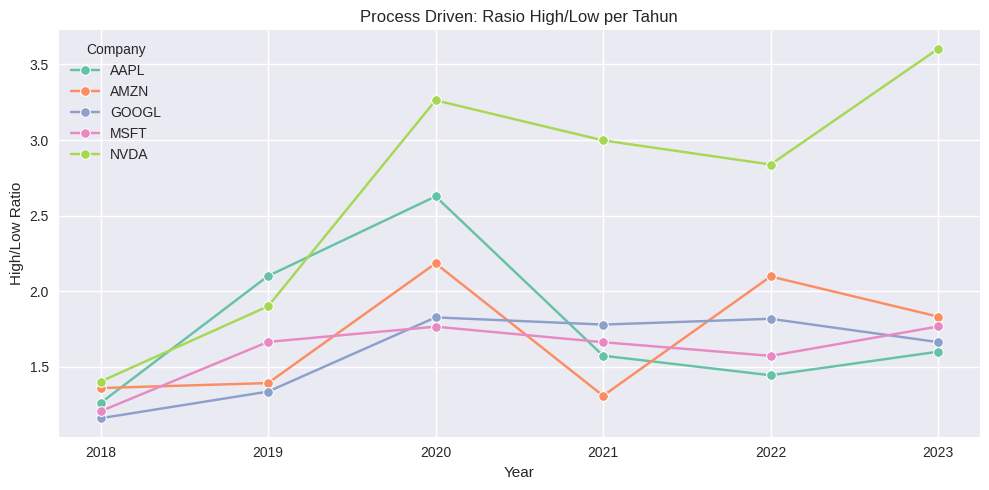

,Company,Year,High,Low,High/Low Ratio
0,AAPL,2018,44.376858,35.174672,1.261614
1,AAPL,2019,71.598763,34.073282,2.101317
2,AAPL,2020,136.381373,51.905771,2.627480
3,AAPL,2021,180.072544,114.363879,1.574558
4,AAPL,2022,180.873387,125.170363,1.445018
5,AAPL,2023,197.702207,123.479803,1.601089
6,AMZN,2018,88.917000,65.349998,1.360627
7,AMZN,2019,101.790001,73.046501,1.393496
8,AMZN,2020,177.612503,81.301498,2.184615
9,AMZN,2021,188.654007,144.050003,1.309643


In [20]:
## PROCESS DRIVEN
# Tambahkan kolom bulan
df['Month'] = df['Date'].dt.month

# Rata-rata harga bulanan per tahun
monthly_avg = df.groupby(['Company', 'Year', 'Month'])['Close'].mean().reset_index(name='Monthly Avg Close')

# Plot tren bulanan dalam satu tahun (gunakan tahun-tahun sebagai contoh)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Monthly Avg Close', hue='Company', marker='o')
plt.title('Process Driven: Rata-rata Harga Saham Bulanan (All Years)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

# Rasio harga tertinggi dan terendah per tahun (stabilitas proses)
price_range = df.groupby(['Company', 'Year']).agg({'High': 'max', 'Low': 'min'}).reset_index()
price_range['High/Low Ratio'] = price_range['High'] / price_range['Low']

# Plot rasio high/low
plt.figure(figsize=(10, 5))
sns.lineplot(data=price_range, x='Year', y='High/Low Ratio', hue='Company', marker='o')
plt.title('Process Driven: Rasio High/Low per Tahun')
plt.grid(True)
plt.tight_layout()
plt.show()

# Tampilkan ringkasan data
price_range


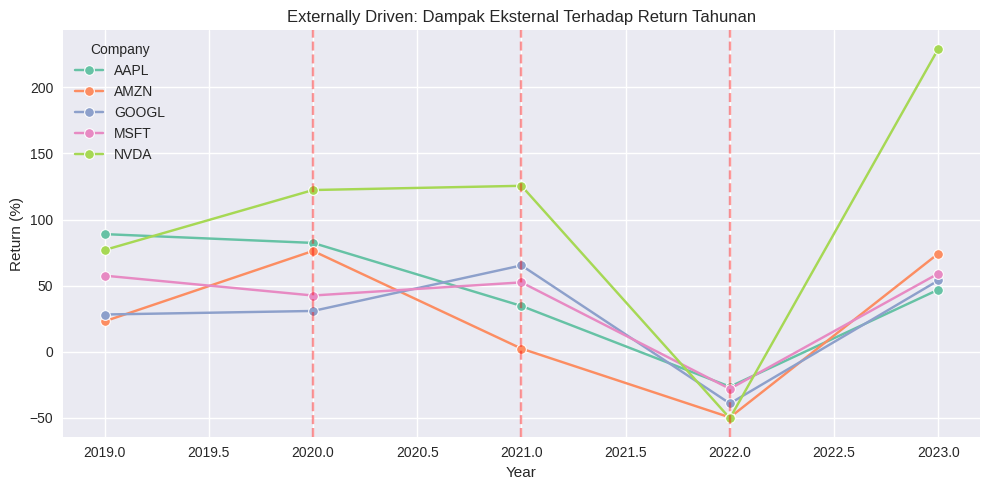

,Company,Year,Close,Yearly Return (%)
9175,AAPL,2018,37.850140,NaN
126654,AAPL,2019,71.520813,88.957858
246586,AAPL,2020,130.387253,82.306726
368153,AAPL,2021,175.564072,34.648187
490293,AAPL,2022,129.207794,-26.404194
602471,AAPL,2023,189.884995,46.960944
9178,AMZN,2018,75.098503,NaN
126657,AMZN,2019,92.391998,23.027750
246589,AMZN,2020,162.846497,76.256061
368156,AMZN,2021,166.716995,2.376777


In [22]:
##EXTERNALLY DRIVEN
# Ambil harga penutupan akhir tahun seperti pada goal driven
external_effect = df.sort_values('Date').groupby(['Company', 'Year']).tail(1)
external_effect = external_effect[['Company', 'Year', 'Close']].sort_values(['Company', 'Year'])

# Hitung return tahunan
external_effect['Yearly Return (%)'] = external_effect.groupby('Company')['Close'].pct_change() * 100

# Tandai tahun-tahun penting
highlight_years = [2020, 2021, 2022]

# Plot return tahunan
plt.figure(figsize=(10, 5))
sns.lineplot(data=external_effect, x='Year', y='Yearly Return (%)', hue='Company', marker='o')

# Tambahkan garis vertikal untuk highlight event global
for year in highlight_years:
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.4)

plt.title('Externally Driven: Dampak Eksternal Terhadap Return Tahunan')
plt.ylabel('Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Tampilkan data return
external_effect
